#### WordCloud_hashtags
#### Frequency

In [1]:
import twint
import pandas as pd


import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')


%matplotlib inline 

In [2]:
from wordcloud import WordCloud
import math
from operator import itemgetter
from PIL import Image 
import PIL 

In [3]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mir-9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
path = "../Dataset FFF/edges.csv"
path_all = "../Dataset FFF/fff.csv"
path_nodes = "../Dataset FFF/nodes.csv"

In [7]:
df= pd.read_csv(path_all)

In [8]:
all_string = ""
for i in range(len(df)):
    ll = str(df["clean_tags"][i]).split(",")[:-1]
    for tg in ll:
        all_string = all_string + tg + " "

In [9]:
# Total number of tags
len(all_string.split())

57813

In [10]:
count = 0
for i in range(len(df)):
    ll = str(df["clean_tags"][i]).split(",")[:-1]
    count = count + len(ll)

In [11]:
#Average number of tags per question
count/len(df)

2.459708985704561

In [12]:
len(set(all_string.split()))

8558

In [32]:
img_path = "../Dataset FFF/Images"

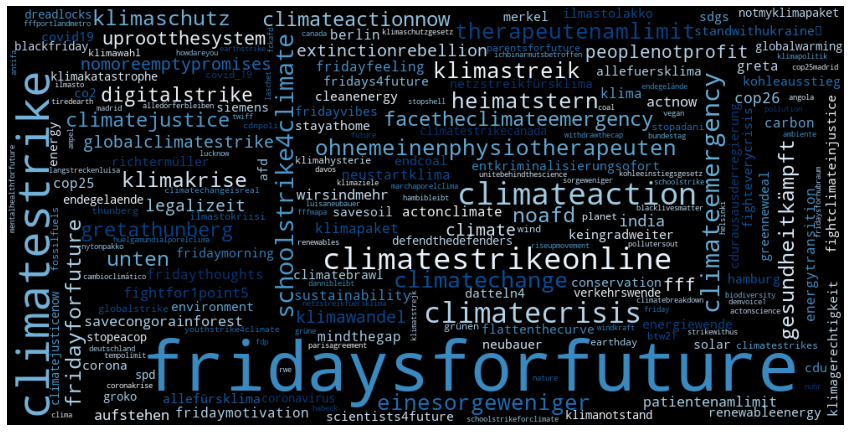

In [34]:
from collections import Counter
word_could_dict=Counter(all_string.split())
wordcloud = WordCloud(width = 1000, height = 500 , colormap="Blues").generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off") 
plt.show()
plt.savefig(img_path+'/tag_cloud.png', bbox_inches='tight')
plt.close()

In [27]:
word_could_dict.most_common(6)

[('fridaysforfuture', 10524),
 ('climatestrike', 3142),
 ('climateaction', 1221),
 ('climatestrikeonline', 1163),
 ('climatecrisis', 1048),
 ('climateemergency', 818)]

In [30]:
for i in range(1, 20):
    print(word_could_dict.most_common()[-i])

('hips', 1)
('ddop', 1)
('amazing', 1)
('gnde', 1)
('hurricanemaria', 1)
('augustsplatz', 1)
('agitaction', 1)
('jeunes', 1)
('energíasrenovables', 1)
('التغير_المناخي', 1)
('برلين', 1)
('onpse', 1)
('indicttrump', 1)
('arresttrump', 1)
('whistleblowergate', 1)
('kohlendioxid', 1)
('istanbul', 1)
('symbolpolitik', 1)
('youthstrike4climatehuddersfield', 1)


### Frequency

In [16]:
from collections import Counter
word_could_dict=Counter(all_string.split())

In [17]:
word_could_dict

Counter({'fossilfuels': 45,
         'wind': 47,
         'solar': 101,
         'green': 14,
         'hydrogen': 6,
         'energy': 83,
         'climateaction': 1221,
         'renewableenergy': 86,
         'carbon': 120,
         'demvoice1': 30,
         'sdgs': 103,
         'climatecrisis': 1048,
         'klimakrise': 510,
         'govegan': 21,
         'fridaysforfuture': 10524,
         'climatestrike': 3142,
         'climate': 289,
         'savesoilbengaluru': 2,
         'peoplepower': 3,
         'actnow': 162,
         'climateemergency': 818,
         'mapa': 21,
         'fasting': 2,
         'fridays': 8,
         'striking': 1,
         'climatejusticenow': 49,
         'climateactionnow': 429,
         'uprootthesystem': 354,
         'mindthegap': 115,
         'globalwarming': 58,
         'globalwarmingisreal': 1,
         'bangladesh': 18,
         'climatejustice': 412,
         'peoplenotprofit': 326,
         'plastic': 5,
         'humanity': 6,
    

In [18]:
less_10=0
less_100 =0
over_1000=0
tot_apperance = 0
for i, k in enumerate(word_could_dict):
    if word_could_dict[k] < 100:
        if word_could_dict[k] < 10:
            less_10 += 1
        less_100 +=1
    if word_could_dict[k] > 1000:
        over_1000+=1
    tot_apperance +=1

In [19]:
less_10/tot_apperance

0.9448469268520683

In [20]:
less_100/tot_apperance

0.9928721663940173

In [21]:
over_1000/tot_apperance

0.0005842486562280906

In [22]:
#edges
G = nx.read_edgelist(path, comments = "S", delimiter = ",", data=(("Count", int),))

In [23]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key = itemgetter(1), reverse = True)
print(" ---- Top 20 nodes by degree ----")
for d in sorted_degree[:20]:
    print("\t" + str(d))

 ---- Top 20 nodes by degree ----
	('fridaysforfuture', 8976)
	('climatestrike', 2081)
	('climateaction', 1302)
	('climatecrisis', 1077)
	('climatechange', 1034)
	('fridayforfuture', 1032)
	('climateemergency', 913)
	('klimakrise', 698)
	('klimaschutz', 675)
	('fff', 659)
	('gretathunberg', 653)
	('klimastreik', 639)
	('climatestrikeonline', 618)
	('climatejustice', 537)
	('extinctionrebellion', 534)
	('climateactionnow', 532)
	('climate', 514)
	('schoolstrike4climate', 507)
	('klimawandel', 477)
	('fridaymotivation', 428)


In [24]:
node = [i for i in range(0,len(sorted_degree))]
count = []
for i in sorted_degree:
    count.append(i[1])

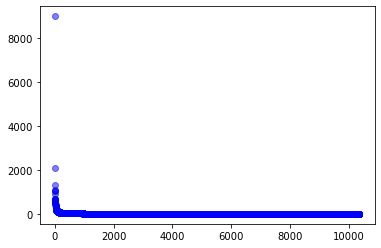

In [25]:
plt.scatter(node, count, c="b", alpha=0.5, )